In [1]:
print("Jupyter Notebook fonctionne ! 🚀")


Jupyter Notebook fonctionne ! 🚀


In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "8"
os.environ["OPENBLAS_NUM_THREADS"] = "8"
os.environ["NUMEXPR_NUM_THREADS"] = "8"
os.environ["MKL_THREADING_LAYER"] = "GNU"  # Force un autre mode de threading


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("Toutes les bibliothèques sont bien installées ! ✅")


Toutes les bibliothèques sont bien installées ! ✅


In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Charger les données Iris (dataset de fleurs très connu)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Afficher les 5 premières lignes
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
import os
print(os.listdir())  # Liste les fichiers du dossier actuel


['.ipynb_checkpoints', 'Mall_Customers.csv', 'Segmentation_Client.ipynb']


In [6]:
import pandas as pd

# Charger les données
df = pd.read_csv("Mall_Customers.csv")

# Afficher les 5 premières lignes du dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Vérifier les infos générales du dataset
df.info()

# Voir les statistiques générales
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


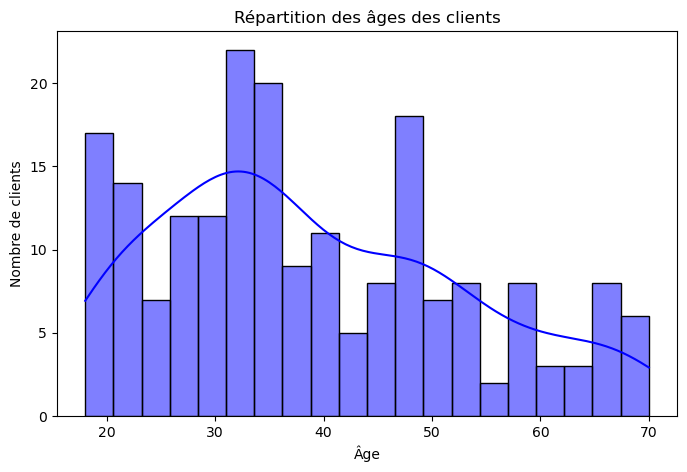

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des âges
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Répartition des âges des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()


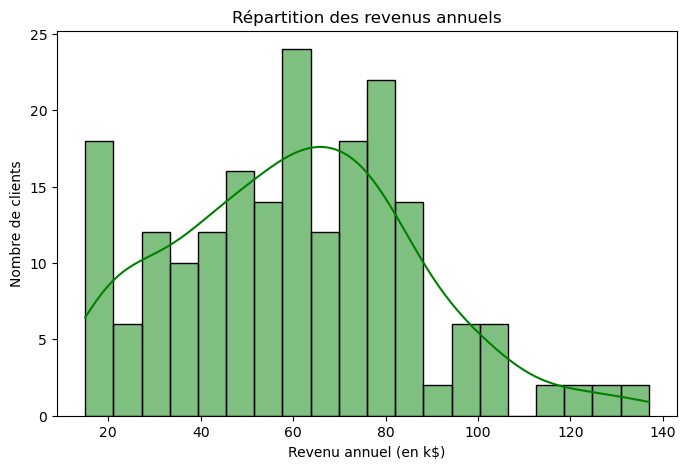

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green")
plt.title("Répartition des revenus annuels")
plt.xlabel("Revenu annuel (en k$)")
plt.ylabel("Nombre de clients")
plt.show()


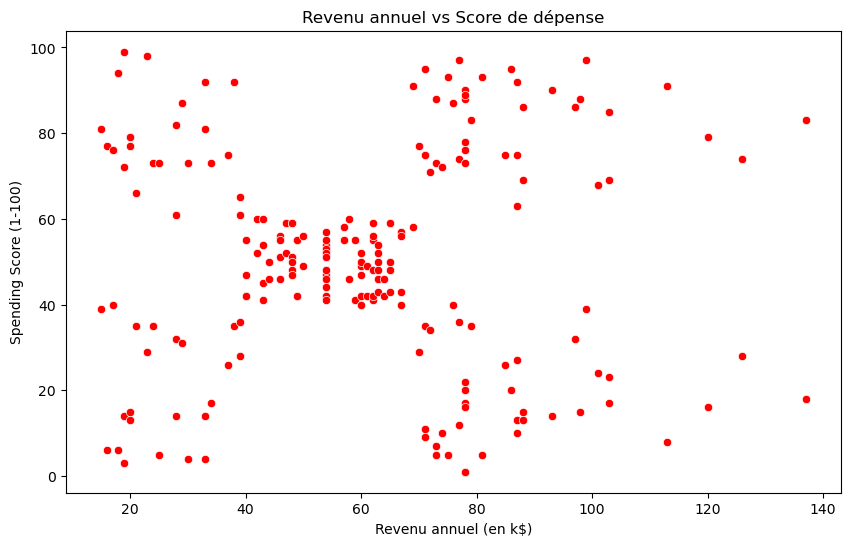

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], color="red")
plt.title("Revenu annuel vs Score de dépense")
plt.xlabel("Revenu annuel (en k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [11]:
# Ajouter une colonne "Catégorie" basée sur revenu et score de dépense
def categoriser_client(row):
    if row["Annual Income (k$)"] < 50 and row["Spending Score (1-100)"] > 50:
        return "Faible revenu - Dépense élevée"
    elif row["Annual Income (k$)"] > 80 and row["Spending Score (1-100)"] < 50:
        return "Haut revenu - Dépense faible"
    elif row["Annual Income (k$)"] > 80 and row["Spending Score (1-100)"] > 50:
        return "Haut revenu - Dépense élevée"
    else:
        return "Faible revenu - Dépense faible"

df["Catégorie"] = df.apply(categoriser_client, axis=1)

# Afficher un échantillon des données avec la nouvelle colonne
df.sample(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Catégorie
14,15,Male,37,20,13,Faible revenu - Dépense faible
176,177,Male,58,88,15,Haut revenu - Dépense faible
10,11,Male,67,19,14,Faible revenu - Dépense faible
112,113,Female,38,64,42,Faible revenu - Dépense faible
156,157,Male,37,78,1,Faible revenu - Dépense faible
182,183,Male,46,98,15,Haut revenu - Dépense faible
146,147,Male,48,77,36,Faible revenu - Dépense faible
115,116,Female,19,65,50,Faible revenu - Dépense faible
191,192,Female,32,103,69,Haut revenu - Dépense élevée
71,72,Female,47,49,42,Faible revenu - Dépense faible


In [12]:
df["Catégorie"].value_counts()


Catégorie
Faible revenu - Dépense faible    125
Faible revenu - Dépense élevée     37
Haut revenu - Dépense faible       19
Haut revenu - Dépense élevée       19
Name: count, dtype: int64

In [13]:
# Top 5 des plus hauts revenus
df.sort_values(by="Annual Income (k$)", ascending=False).head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Catégorie
199,200,Male,30,137,83,Haut revenu - Dépense élevée
198,199,Male,32,137,18,Haut revenu - Dépense faible
197,198,Male,32,126,74,Haut revenu - Dépense élevée
196,197,Female,45,126,28,Haut revenu - Dépense faible
195,196,Female,35,120,79,Haut revenu - Dépense élevée


In [14]:
# Top 5 des plus bas revenus
df.sort_values(by="Annual Income (k$)", ascending=True).head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Catégorie
0,1,Male,19,15,39,Faible revenu - Dépense faible
1,2,Male,21,15,81,Faible revenu - Dépense élevée
2,3,Female,20,16,6,Faible revenu - Dépense faible
3,4,Female,23,16,77,Faible revenu - Dépense élevée
4,5,Female,31,17,40,Faible revenu - Dépense faible


C:\Users\paulb\AppData\Local\Temp\ipykernel_4720\846027046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorie_counts.index, y=categorie_counts.values, palette="viridis")


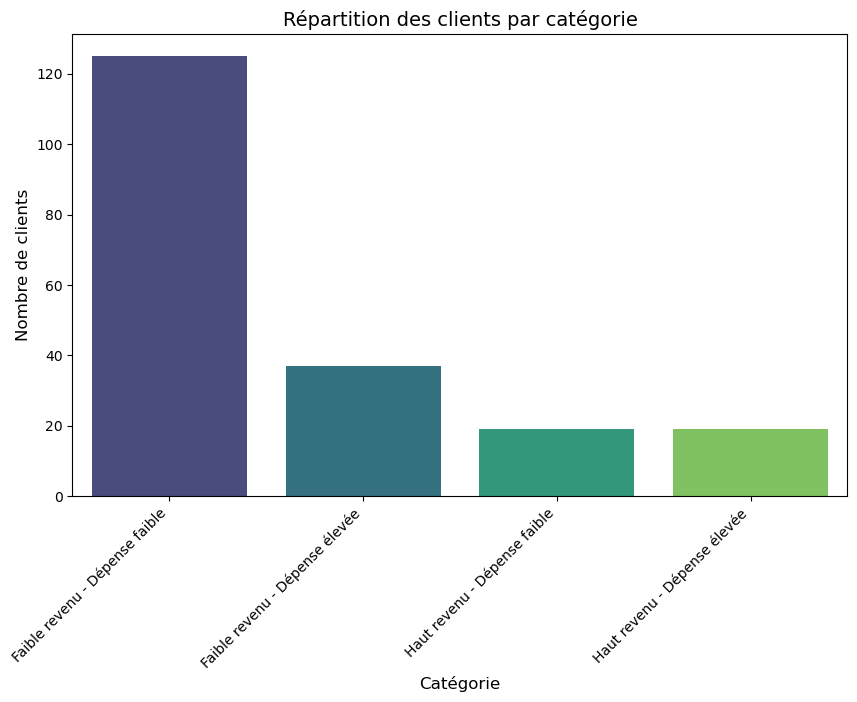

In [15]:
categorie_counts = df["Catégorie"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=categorie_counts.index, y=categorie_counts.values, palette="viridis")

plt.title("Répartition des clients par catégorie", fontsize=14)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.show()


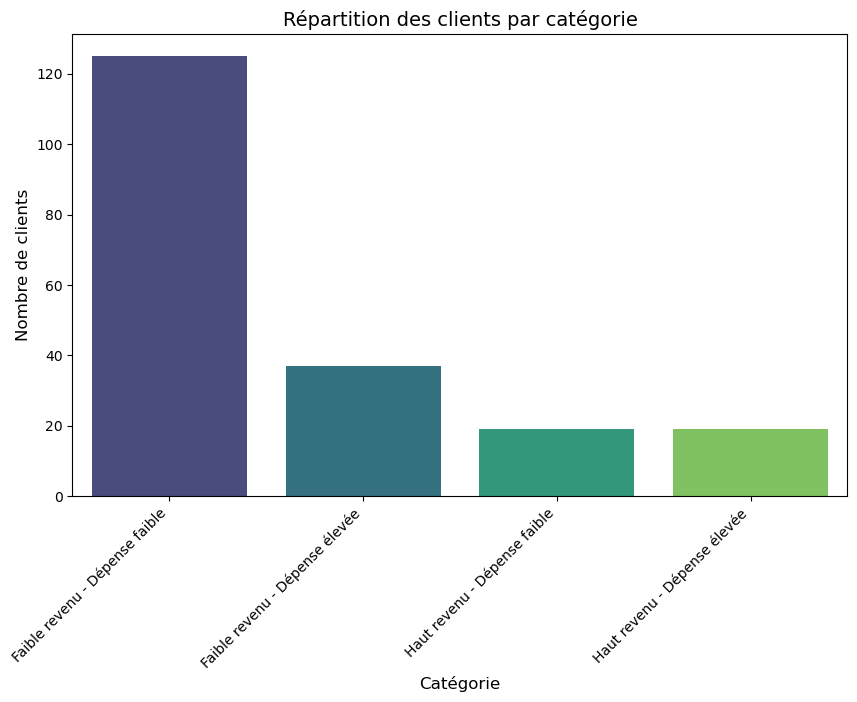

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=categorie_counts.index, y=categorie_counts.values, hue=categorie_counts.index, palette="viridis", legend=False)

plt.title("Répartition des clients par catégorie", fontsize=14)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes pertinentes
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardisation des données (meilleure performance pour K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données préparées et standardisées !")


✅ Données préparées et standardisées !


C:\Users\paulb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

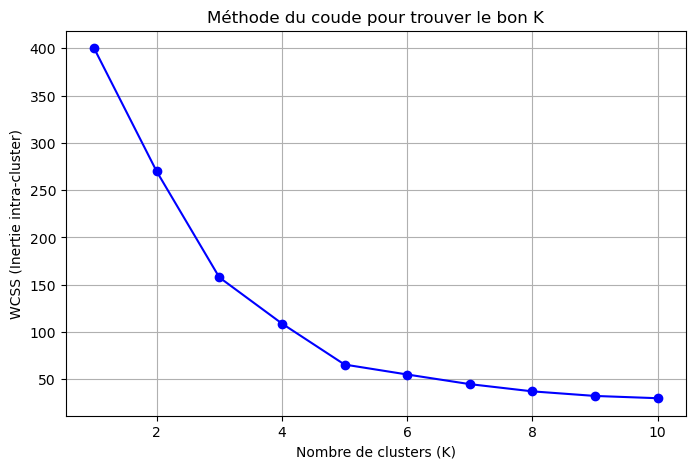

In [18]:
import os
os.environ["OMP_NUM_THREADS"] = "8"
os.environ["LOKY_MAX_CPU_COUNT"] = "8"


from sklearn.cluster import KMeans

# 📌 Tester plusieurs valeurs de K (de 1 à 10)
wcss = []  # Liste pour stocker l'inertie intra-cluster
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS = Somme des distances intra-clusters

# 📊 Tracer la courbe du coude
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("WCSS (Inertie intra-cluster)")
plt.title("Méthode du coude pour trouver le bon K")
plt.grid(True)

# Affichage du graphique
plt.show()


In [38]:
# Appliquer K-Means avec 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("✅ Clustering K-Means terminé avec K=5 !")

✅ Clustering K-Means terminé avec K=5 !


C:\Users\paulb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


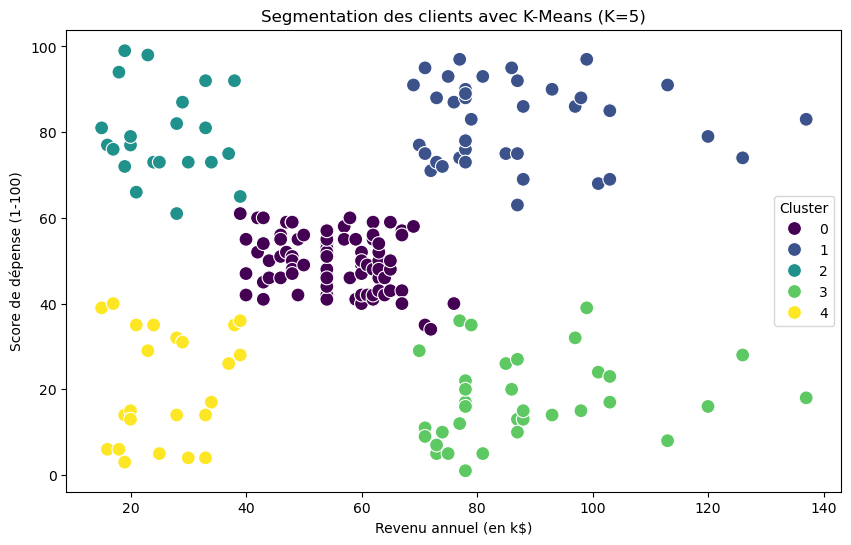

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Segmentation des clients avec K-Means (K=5)")
plt.xlabel("Revenu annuel (en k$)")
plt.ylabel("Score de dépense (1-100)")
plt.show()


In [42]:
# Ajouter les clusters au DataFrame
df["Cluster"] = kmeans.labels_

# Afficher un échantillon des données
df.sample(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Catégorie,Cluster
16,17,Female,35,21,35,Faible revenu - Dépense faible,4
137,138,Male,32,73,73,Faible revenu - Dépense faible,1
163,164,Female,31,81,93,Haut revenu - Dépense élevée,1
24,25,Female,54,28,14,Faible revenu - Dépense faible,4
76,77,Female,45,54,53,Faible revenu - Dépense faible,0
181,182,Female,32,97,86,Haut revenu - Dépense élevée,1
19,20,Female,35,23,98,Faible revenu - Dépense élevée,2
124,125,Female,23,70,29,Faible revenu - Dépense faible,3
189,190,Female,36,103,85,Haut revenu - Dépense élevée,1
135,136,Female,29,73,88,Faible revenu - Dépense faible,1


In [44]:
df.groupby("Cluster")["Age"].mean()


Cluster
0    42.716049
1    32.692308
2    25.272727
3    41.114286
4    45.217391
Name: Age, dtype: float64

In [46]:
df.groupby(["Cluster", "Gender"])["CustomerID"].count()


Cluster  Gender
0        Female    48
         Male      33
1        Female    21
         Male      18
2        Female    13
         Male       9
3        Female    16
         Male      19
4        Female    14
         Male       9
Name: CustomerID, dtype: int64

C:\Users\paulb\AppData\Local\Temp\ipykernel_4720\979896867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Age", data=df, palette="viridis")


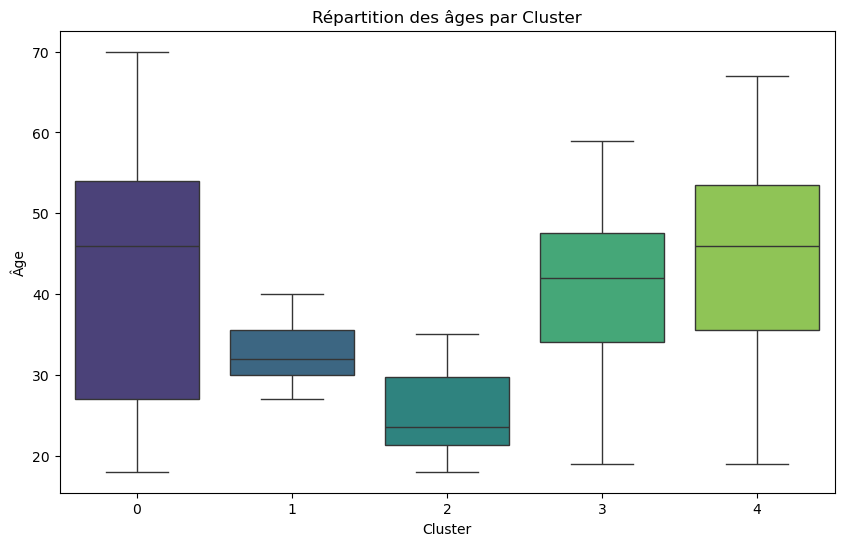

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Cluster", y="Age", data=df, palette="viridis")
plt.title("Répartition des âges par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Âge")
plt.show()
